In [1]:
import geopandas as gpd
import contextily as ctx # for basemaps
from shapely.geometry import Point, LineString, Polygon
from matplotlib import pyplot as plt

In [2]:
# path to shapefile
filepath = "Shapefile/DAMSELFISH_distributions.shp"

# Read file using gpd.read_file()
data = gpd.read_file(filepath)

In [3]:
data.head() #look at top entries - looks like a pandas dataframe

,id_no,binomial,origin,compiler,year,citation,source,dist_comm,island,subspecies,...,class_name,order_name,family_nam,genus_name,species_na,category,shape_Leng,shape_Area,ORIG_FID,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,82.368856,28.239363,0,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,82.368856,28.239363,0,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,82.368856,28.239363,0,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,729.012180,87.461539,1,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,729.012180,87.461539,1,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


In [4]:
data.columns

Index(['id_no', 'binomial', 'origin', 'compiler', 'year', 'citation', 'source',
       'dist_comm', 'island', 'subspecies', 'subpop', 'legend', 'seasonal',
       'tax_comm', 'rl_update', 'kingdom_na', 'phylum_nam', 'class_name',
       'order_name', 'family_nam', 'genus_name', 'species_na', 'category',
       'shape_Leng', 'shape_Area', 'ORIG_FID', 'geometry'],
      dtype='object')

In [5]:
# Note the column 'geometry' is full of shapely Polygon objects
type(data['geometry'].iloc[0])

shapely.geometry.polygon.Polygon

In [6]:
data['geometry']

0      POLYGON ((-115.64375 29.71392, -115.61585 29.6...
1      POLYGON ((-105.58995 21.89340, -105.56483 21.8...
2      POLYGON ((-111.15962 19.01536, -111.15948 18.9...
3      POLYGON ((-80.86500 -0.77894, -80.75930 -0.833...
4      POLYGON ((-67.33922 -55.67610, -67.33755 -55.6...
                             ...                        
226    POLYGON ((-120.11829 34.47283, -120.10502 34.4...
227    POLYGON ((-117.41363 29.18823, -117.40898 29.1...
228    POLYGON ((-114.63839 28.39008, -114.63660 28.3...
229    POLYGON ((-111.15962 19.01536, -111.15948 18.9...
230    POLYGON ((-114.24428 22.71135, -114.24818 22.7...
Name: geometry, Length: 231, dtype: geometry

In [7]:
# geopandas adds useful attributes to the geodataframe, such as the ability to get bounds
# of all the geometry data
data.bounds

,minx,miny,maxx,maxy
0,-116.222084,21.890988,-108.497261,29.767482
1,-107.594206,18.358633,-103.606827,22.256010
2,-112.956729,18.045856,-111.159482,19.956861
3,-82.225059,-57.388035,-67.241505,-0.692622
4,-67.356079,-55.719820,-67.318440,-55.663008
...,...,...,...,...
226,-120.491194,31.735737,-117.143276,34.476475
227,-119.352264,27.831807,-117.397705,30.225376
228,-116.439015,27.239447,-114.631652,29.299307
229,-112.956729,18.045856,-111.159482,19.956861


In [8]:
# similary, we can get attributes such as boundary
data.boundary

0      MULTILINESTRING ((-115.64375 29.71392, -115.61...
1      MULTILINESTRING ((-105.58995 21.89340, -105.56...
2      MULTILINESTRING ((-111.15962 19.01536, -111.15...
3      MULTILINESTRING ((-80.86500 -0.77894, -80.7593...
4      LINESTRING (-67.33922 -55.67610, -67.33755 -55...
                             ...                        
226    MULTILINESTRING ((-120.11829 34.47283, -120.10...
227    MULTILINESTRING ((-117.41363 29.18823, -117.40...
228    MULTILINESTRING ((-114.63839 28.39008, -114.63...
229    MULTILINESTRING ((-111.15962 19.01536, -111.15...
230    LINESTRING (-114.24428 22.71135, -114.24818 22...
Length: 231, dtype: geometry

Sistemas de referência de coordenadas
Existem muitos sistemas de referência de coordenadas (CRS), que se referem a diferentes maneiras de indicar a que local da Terra você está se referindo quando fornece uma coordenada. Diferentes CRS usam diferentes modelos da superfície da Terra, projeções de mapa, unidades e pontos de origem (onde 0,0 é). A discussão dos detalhes está além do escopo deste curso.

Para os fins deste curso, usaremos principalmente os dois seguintes:

WGS 84: https://epsg.io/4326
The CRS used by the GPS system
units: degrees
0,0 is the intersection of greenwich meridian and equator
epsg code: 4326
Mercator Web: https://epsg.io/3857
The CRS used by most web maps, such as Google maps, OSM, Bing, etc.
Not accurate at high latitudes >85 degrees, <-85 degrees
units: meters
0,0 is intersection of greensich meridian and equator
epsg code: 3857

In [9]:
# área irá avisá-lo se você estiver tentando fazer cálculos de área no CRS geográfico
data.area

C:\Users\Deja\AppData\Local\Temp/ipykernel_15588/443688411.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data.area


0      19.396254
1       6.145902
2       2.697207
3      87.460621
4       0.000918
         ...    
226     5.990467
227     3.638651
228     2.849025
229     2.697207
230     2.237186
Length: 231, dtype: float64

In [10]:
data_in_3857 = data.to_crs('epsg:3857')
data_in_3857.area

0      2.668953e+11
1      8.128889e+10
2      3.535144e+10
3      1.434295e+12
4      2.019379e+07
           ...     
226    8.857492e+10
227    5.157407e+10
228    4.009144e+10
229    3.535144e+10
230    3.025350e+10
Length: 231, dtype: float64

In [11]:
# podemos verificar quais espécies podem ser encontradas entre as latitudes 10 e 20 graus norte
data.intersects(Polygon([(-180,10),(180,10),(180,20),(-180,20)]))

0      False
1       True
2       True
3      False
4      False
       ...  
226    False
227    False
228    False
229     True
230    False
Length: 231, dtype: bool

# Plotagem
Geopandas fornece uma .plot() função útil que cria uma figura matplotlib e retorna um objeto de eixos.

Há uma tonelada de bibliotecas adicionais que fornecem mais funcionalidade de plotagem, e vamos explorar algumas delas aqui. Não há um conjunto "correto" de bibliotecas para usar com GIS em python, e depende de você descobrir quais se encaixam melhor em seu fluxo de trabalho.

A cmapopção da .plot()função permite que você passe um nome de mapa de cores matplotlib , que são coleções de cores usadas para visualizar os dados

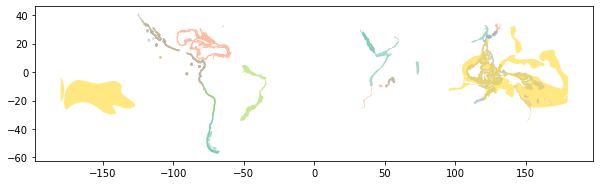

In [12]:
# we can use the built-in geopandas plot function to visualize
ax = data.plot(figsize=(10,5), alpha=0.6, cmap='Set2')

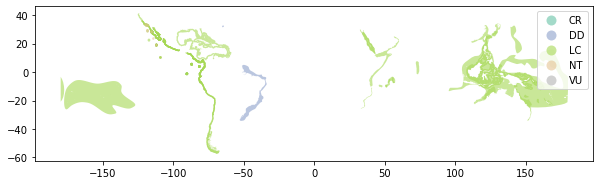

In [13]:
ax = data.plot(figsize=(10,5), alpha=0.6, cmap='Set2', column='category', legend=True)

Outro uso comum de cores para codificar dados é representar dados numéricos em uma área com cores. Isso é conhecido como coropleto .

Vamos usar isso para codificar as áreas de cada região

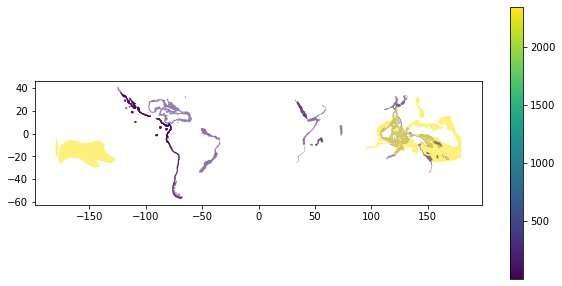

In [14]:
#then pass the area column as an argument
ax = data.plot(figsize=(10,5), alpha=0.6, column='shape_Area', legend=True)

<AxesSubplot:>

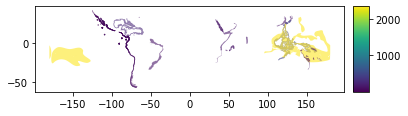

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax) #makes it so you can append to the axes

#put another axes to the right of it, at 5% of the total width with 0.1 points of padding in between
cax = divider.append_axes("right", size="5%", pad=0.1) 
# note that you have to specify both ax and cax as arguments for it to work
data.plot(figsize=(10,5), alpha=0.6, column='shape_Area', 
          legend=True, ax=ax, cax=cax)

Podemos verificar quais espécies podem ser encontradas entre as latitudes 10 e 20 graus norte. Os dados por si só parecem um monte de bolhas. Vamos colocá-lo em um mapa para contexto

Contextily é uma biblioteca para a criação de mapas base. Ele extrai dados de um host de diferentes provedores de mapa base - consulte a documentação para obter mais detalhes.

In [17]:
# the data is currently in WGS84 (epsg:4326)
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

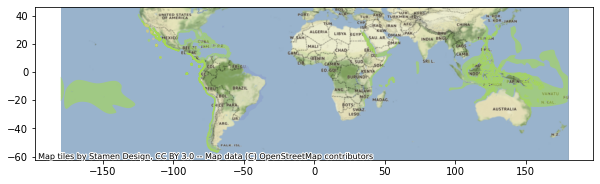

In [18]:
ax = data.plot(figsize=(10,5), alpha=0.6, cmap='Set2', column='category')
# now we add a basemap. ctx finds a basemap for a background from
# an online repository.
# It assumes the data is in web mercator (epsg:3857) unless you specify otherwise
ctx.add_basemap(ax, crs=data.crs)

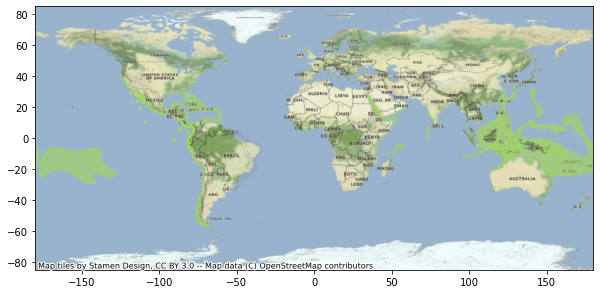

In [19]:
# we can set bounds using matplotlib
ax = data.plot(figsize=(10,5), alpha=0.6, cmap='Set2', column='category')
ax.set_xlim([-180,180])
ax.set_ylim([-85,85])
ctx.add_basemap(ax, crs=data.crs)

In [20]:
# to look at all of the different providers, check:
ctx.providers

{'OpenStreetMap': {'Mapnik': {'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.Mapnik'},
  'DE': {'url': 'https://{s}.tile.openstreetmap.de/tiles/osmde/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.DE'},
  'CH': {'url': 'https://tile.osm.ch/switzerland/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap contributors',
   'bounds': [[45, 5], [48, 11]],
   'name': 'OpenStreetMap.CH'},
  'France': {'url': 'https://{s}.tile.openstreetmap.fr/osmfr/{z}/{x}/{y}.png',
   'max_zoom': 20,
   'html_attribution': '&copy; OpenStreetMap France | &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'attribution': '(C) OpenStreetMap France | (C) OpenStreetMap contributors',
   'name': 'OpenStreetMap.France'},
  'HOT': {'url': 'https://{s}.tile.openstreetmap.fr/hot/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles style by <a href="https://www.hotosm.org/" target="_blank">Humanitarian OpenStreetMap Team</a> hosted by <a href="https://openstreetmap.fr/" target="_blank">OpenStreetMap France</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France',
   'name': 'OpenStreetMap.HOT'},
  'BZH': {'url': 'https://tile.openstreetmap.bzh/br/{z}/{x}/{y}.png',
   'max_zoom': 19,
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, Tiles courtesy of <a href="http://www.openstreetmap.bzh/" target="_blank">Breton OpenStreetMap Team</a>',
   'attribution': '(C) OpenStreetMap contributors, Tiles courtesy of Breton OpenStreetMap Team',
   'bounds': [[46.2, -5.5], [50, 0.7]],
   'name': 'OpenStreetMap.BZH'},
  'BlackAndWhite': {'url': 'http://{s}.tiles.wmflabs.org/bw-mapnik/{z}/{x}/{y}.png',
   'max_zoom': 18,
   'attribution': '(C) OpenStreetMap contributors',
   'html_attribution': '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
   'name': 'OpenStreetMap.BlackAndWhite'}},
 'OpenSeaMap': {'url': 'https://tiles.openseamap.org/seamark/{z}/{x}/{y}.png',
  'html_attribution': 'Map data: &copy; <a href="http://www.openseamap.org">OpenSeaMap</a> contributors',
  'attribution': 'Map data: (C) OpenSeaMap contributors',
  'name': 'OpenSeaMap'},
 'OPNVKarte': {'url': 'https://tileserver.memomaps.de/tilegen/{z}/{x}/{y}.png',
  'max_zoom': 18,
  'html_attribution': 'Map <a href="https://memomaps.de/">memomaps.de</a> <a href="http://creativecommons.org/licenses/by-sa/2.0/">CC-BY-SA</a>, map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors',
  'attribution': 'Map memomaps.de CC-BY-SA, map data (C) OpenStreetMap contributors',
  'name': 'OPNVKarte'},
 'OpenTopoMap': {'url': 'https://{s}.tile.opentopomap.org/{z}/{x}/{y}.png',
  'max_zoom': 17,
  'html_attribution': 'Map data: &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors, <a href="http://viewfinderpanoramas.org">SRTM</a> | Map style: &copy; <a href="https://opentopomap.org">OpenTopoMap</a> (<a href="https://creativecommons.org/licenses/by-sa/3.0/">CC-BY-SA</a>)',
  'attribution': 'Map data: (C) OpenStreetMap contributors, SRTM | Map style: (C) OpenTopoMap (CC-BY-SA)',
  'name': 'OpenTopoMap'},
 'OpenRailwayMap': {'url': 'https://{s}.tiles.openrailwaymap.org/standard/{z}/{x}/{y}.png',
  'max_

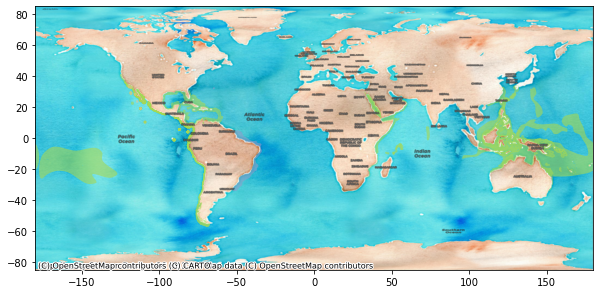

In [21]:
ax = data.plot(figsize=(10,5), alpha=0.6, cmap='Set2', column='category')
ax.set_xlim([-180,180])
ax.set_ylim([-85,85])
# to specify the type of basemap, specify the source argument
# the syntax is ctx.providers.{provider name}.{provider style}
ctx.add_basemap(ax, crs=data.crs, source=ctx.providers.Stamen.Watercolor)
# you can add labels independently of the background
ctx.add_basemap(ax, crs=data.crs, source=ctx.providers.CartoDB.DarkMatterOnlyLabels)

visualizações dos diferentes estilos de mapa base podem ser visualizadas em: http://leaflet-extras.github.io/leaflet-providers/preview/

In [22]:
# podemos baixar blocos de fundo como imagens para um carregamento mais rápido (não é necessário manter o download novamente)
# vamos usar os limites de um dos locais de peixes como exemplo
w,s,e,n = data.loc[25,'geometry'].bounds
data.loc[10,'geometry'].bounds

(-79.56737515199995, 8.442261236000036, -78.48675787199994, 9.030436516000066)

A função bounds2img pega as coordenadas e o nível de zoom e baixa os blocos correspondentes do mapa como imagens

[(-12544723.739110544, -12090944.453255981),
 (2498442.0929655447, 2884399.3464440187)]

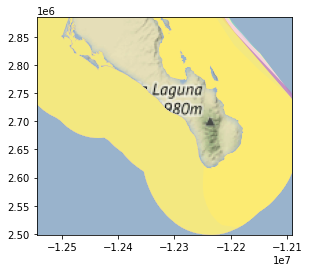

In [23]:
img, ext = ctx.bounds2img(w, s, e, n, 6, ll=True) #ll means coordinates are in lat-lon
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(img, extent=ext)
# bounds2img returns things in epsg:3857, so we need to plot the data in the same crs
data.to_crs(epsg=3857).plot(ax=ax, cmap='Set3', alpha=0.8)
ax_bounds = data.to_crs(epsg=3857).loc[25,'geometry'].bounds
ax.set(xlim=[ax_bounds[0],ax_bounds[2]],ylim=[ax_bounds[1],ax_bounds[3]])


# Escrevendo para um shapefile
Primeiro, faremos um diretório para enviar os dados. Usamos o mkdircomando que torna uma pasta vazia. A -popção irá ignorá-lo se o diretório já existir

In [24]:
!mkdir output_data -p

In [25]:
# let's write the first 50 rows of the shapefile to a new file
outfp = "output_data/DAMSELFISH_distributions_SELECTION.shp"

# Select first 50 rows
selection = data[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

# Converter formas em GeoDataFrames
Você pode usar objetos geométricos Shapely para criar um GeoDataFrame do zero.

In [26]:
# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# add a geometry column (necessary for shapefile)
newdata['geometry'] = None

# Let's see what we have at the moment
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


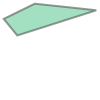

In [27]:
# Coordinates of the MIT main campus in Decimal Degrees
coordinates = [(-71.092562, 42.357602), ( -71.080155, 42.361553), ( -71.089817, 42.362584), (-71.094688, 42.360198)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
poly

# Ponto de verificação rápido! 
Encontre as coordenadas dos cantos de um lugar que tenha um significado significativo para você. Assim como fizemos acima, faça um polígono Shapely a partir da lista de coordenada-tupla dos cantos de seu ponto de referência pessoal. Mostre! Pode ser tão grande quanto você quiser. Se quiser, compartilhe com a classe o lugar e por que ele é importante para você.

In [28]:
# Coordinates of place of signficance in Decimal Degrees
coordinates_personal =[]

# Create a Shapely polygon from the coordinate-tuple list
poly_personal =Polygon

#Show the place and share out its significance if you want


In [29]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly
newdata

,geometry
0,"POLYGON ((-71.09256 42.35760, -71.08016 42.361..."


In [30]:
newdata.loc[0, 'location'] = 'MIT main campus'
newdata

,geometry,location
0,"POLYGON ((-71.09256 42.35760, -71.08016 42.361...",MIT main campus


Antes de exportar os dados é necessário definir o sistema de referência de coordenadas (projeção) para o GeoDataFrame.

Vamos definir os crs usando uma função da fiona, outra biblioteca GIS integrada com geopandas.

In [32]:
# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata = newdata.set_crs('epsg:4326')

# Let's see how the crs definition looks like
newdata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [33]:
outfp = "output_data/MIT_campus.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

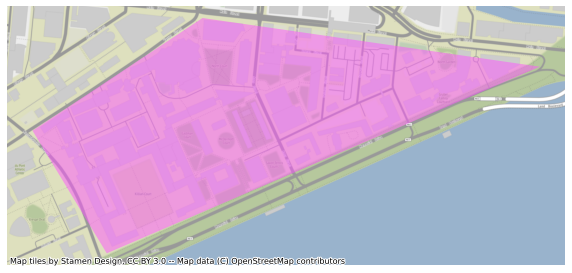

In [34]:
# Let's plot it
ax = newdata.to_crs(epsg=3857).plot(figsize=(10,5),alpha = 0.5, color='#FF55FF')
ctx.add_basemap(ax)
ax.set_axis_off() # remove the x-y axes